# Lab: Preprocessing & Cleansing Data

Handling Missing Values in a Customer Database
- Dataset: `notebook_data/w07/data/Telco-Customer-Churn.csv`
- Description: A telecom company has a customer database with missing values in columns such as age, income, and occupation. Use Spark to detect and handle missing values using techniques such as mean/median imputation, interpolation, or regression imputation.


## Initialization

In [1]:
data_prefix = 'notebook_data/w07/data'
customer_churn = f'{data_prefix}/Telco-Customer-Churn.csv'

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [3]:
df = spark.read.csv(path=customer_churn, inferSchema=True, header=True).cache()

## Understanding data

In [4]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [5]:
df.show(10)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

In [6]:
df.count()

7043

### Getting statistical information from the DataFrames `df`
Get statistical metrics such as minimum, maximum, standard deviation, mean, mode, and median.

In data science, statistical measures are essential for analyzing and interpreting data. Here are some of the most commonly used statistical metrics:

1. Mean
- Definition: The mean, often referred to as the average, is calculated by summing all values in a dataset and dividing by the number of values. It provides a measure of central tendency, indicating where the data is concentrated.
- Formula: Mean = (Sum of all values) / (Number of values)
- Interpretation: The mean represents the "typical" value in the dataset but is sensitive to outliers, which can skew the result significantly

2. Median
- Definition: The median is the middle value in a dataset when the values are arranged in ascending order. If there is an even number of observations, the median is the average of the two middle values.
- Steps to Find:
Arrange the data in ascending order.
If the number of data points is odd, the median is the middle value.
If even, it is the average of the two middle values.
- Interpretation: The median is robust to outliers, making it a better measure of central tendency in skewed distributions 

3. Mode
- Definition: The mode is the value that appears most frequently in a dataset. A dataset can have one mode (unimodal), more than one mode (multimodal), or no mode at all if all values occur with the same frequency.
- Interpretation: The mode is particularly useful for categorical data or to identify the most common value in a dataset. It can reveal insights about the distribution of data that the mean and median might not show

4. Standard Deviation
- Definition: Standard deviation measures the amount of variation or dispersion in a set of values. A low standard deviation indicates that the values tend to be close to the mean, while a high standard deviation indicates that the values are spread out over a wider range.
- Formula: Standard Deviation = √[(Σ(value - mean)²) / (number of values)]
- Interpretation: It quantifies the variability within a dataset, which is crucial for understanding data consistency and reliability

5. Variance
- Definition: Variance is the square of the standard deviation and provides a measure of how much the values in a dataset differ from the mean.
- Interpretation: Variance is often used in statistical analyses and machine learning to understand the spread of data points

6. Range
- Definition: The range is the difference between the maximum and minimum values in a dataset.
- Interpretation: It provides a simple measure of variability but does not give information about the distribution of values within that range

7. Interquartile Range (IQR)
- Definition: The IQR measures the range of the middle 50% of the data, calculated as the difference between the first quartile (Q1) and the third quartile (Q3).
- Interpretation: It is a robust measure of variability that is less affected by outliers and provides insights into the spread of the central portion of the data

8. Skewness
- Definition: Skewness measures the asymmetry of the distribution of values in a dataset. A skewness of zero indicates a symmetric distribution, while positive or negative values indicate right or left skew, respectively.
- Interpretation: Understanding skewness helps in assessing the normality of the data, which is important for many statistical analyses.

9. Kurtosis
- Definition: Kurtosis measures the "tailedness" of the distribution. High kurtosis indicates heavy tails and a sharp peak, while low kurtosis indicates light tails and a flatter peak.
- Interpretation: It provides insights into the likelihood of extreme values in the dataset.

10. Percentiles
- Definition: Percentiles indicate the relative standing of a value within a dataset. For example, the 25th percentile (Q1) is the value below which 25% of the data falls.
- Interpretation: Percentiles are useful for understanding the distribution of data and identifying outliers.


#### Using Pandas
Pandas provides a straightforward way to calculate these metrics using built-in functions.

In [8]:
pd_df = df.toPandas()

In [9]:
pd_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
# Mean
mean_value = pd_df['MonthlyCharges'].mean()

# Median
median_value = pd_df['MonthlyCharges'].median()

# Mode
mode_value = pd_df['MonthlyCharges'].mode()  # mode() returns a Series

# Standard Deviation
std_dev = pd_df['MonthlyCharges'].std()

# Variance
variance = pd_df['MonthlyCharges'].var()

# Range
data_range = pd_df['MonthlyCharges'].max() - pd_df['MonthlyCharges'].min()

# Interquartile Range (IQR)
Q1 = pd_df['MonthlyCharges'].quantile(0.25)
Q3 = pd_df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Skewness
skewness = pd_df['MonthlyCharges'].skew()

# Kurtosis
kurtosis = pd_df['MonthlyCharges'].kurtosis()

# Percentiles
percentiles = pd_df['MonthlyCharges'].quantile([0.25, 0.5, 0.75])

In [15]:
mean_value

np.float64(64.76169246059918)

In [16]:
median_value

np.float64(70.35)

In [17]:
mode_value

0    20.05
Name: MonthlyCharges, dtype: float64

In [18]:
std_dev

np.float64(30.090047097678493)

In [19]:
variance

np.float64(905.4109343405098)

In [20]:
data_range

np.float64(100.5)

In [21]:
Q1

np.float64(35.5)

In [23]:
Q3

np.float64(89.85)

In [24]:
IQR

np.float64(54.349999999999994)

In [25]:
skewness

np.float64(-0.22052443394398033)

In [26]:
kurtosis

np.float64(-1.2572596945495056)

In [27]:
percentiles

0.25    35.50
0.50    70.35
0.75    89.85
Name: MonthlyCharges, dtype: float64

#### Using PySpark
In PySpark, you can calculate these metrics using the DataFrame API

In [7]:
df.describe().show()

+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|summary|customerID|gender|     SeniorCitizen|Partner|Dependents|            tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|    MonthlyCharges|      TotalCharges|Churn|
+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|  count|      7043|  7043|              7043|   7043|      7043|     

In [28]:
from pyspark.sql.functions import col, mean, stddev, variance, skewness, kurtosis

In [41]:
# Mean
df.select(mean(col("MonthlyCharges"))).show()

+-------------------+
|avg(MonthlyCharges)|
+-------------------+
|  64.76169246059922|
+-------------------+



In [44]:
# Median
df.approxQuantile("MonthlyCharges", [0.5], 0)

[70.35]

In [48]:
# Mode (using groupBy and count)
df.groupBy("MonthlyCharges").count().orderBy("count", ascending=False).show()

+--------------+-----+
|MonthlyCharges|count|
+--------------+-----+
|         20.05|   61|
|         19.85|   45|
|         19.95|   44|
|          19.9|   44|
|         19.65|   43|
|          19.7|   43|
|          20.0|   43|
|         19.55|   40|
|         20.15|   40|
|         19.75|   39|
|         20.25|   39|
|          19.8|   38|
|         20.35|   38|
|          19.6|   37|
|          20.1|   37|
|          20.2|   35|
|          19.5|   32|
|         20.45|   31|
|          19.4|   31|
|          20.4|   30|
+--------------+-----+
only showing top 20 rows



In [51]:
# Standard Deviation
df.select(stddev(col("MonthlyCharges"))).show()

+----------------------+
|stddev(MonthlyCharges)|
+----------------------+
|    30.090047097678482|
+----------------------+



In [58]:
# Variance
df.selectExpr('variance(MonthlyCharges)').show()

+------------------------+
|variance(MonthlyCharges)|
+------------------------+
|       905.4109343405092|
+------------------------+



In [60]:

# Range
df.agg({"MonthlyCharges": "max"}).collect()[0][0] - df.agg({"MonthlyCharges": "min"}).collect()[0][0]

100.5

In [61]:
# Interquartile Range (IQR)
Q1 = df.approxQuantile("MonthlyCharges", [0.25], 0)[0]
Q3 = df.approxQuantile("MonthlyCharges", [0.75], 0)[0]
IQR = Q3 - Q1

In [62]:
Q1

35.5

In [63]:
Q3

89.85

In [64]:
IQR

54.349999999999994

In [65]:
# Skewness
df.select(skewness(col("MonthlyCharges"))).show()

+------------------------+
|skewness(MonthlyCharges)|
+------------------------+
|    -0.22047746443917748|
+------------------------+



In [66]:
# Kurtosis
df.select(kurtosis(col("MonthlyCharges"))).show()

+------------------------+
|kurtosis(MonthlyCharges)|
+------------------------+
|       -1.25721910093818|
+------------------------+



In [67]:
# Percentiles
df.approxQuantile("MonthlyCharges", [0.25, 0.5, 0.75], 0)

[35.5, 70.35, 89.85]

### Visualization the statistical metrics

In [69]:
modes = df.groupBy("MonthlyCharges").count().orderBy("count", ascending=False).toPandas()

In [70]:
modes

,MonthlyCharges,count
0,20.05,61
1,19.85,45
2,19.95,44
3,19.90,44
4,19.70,43
...,...,...
1580,48.45,1
1581,73.10,1
1582,58.65,1
1583,82.70,1


In [71]:
import seaborn as sns

<Axes: xlabel='MonthlyCharges', ylabel='count'>

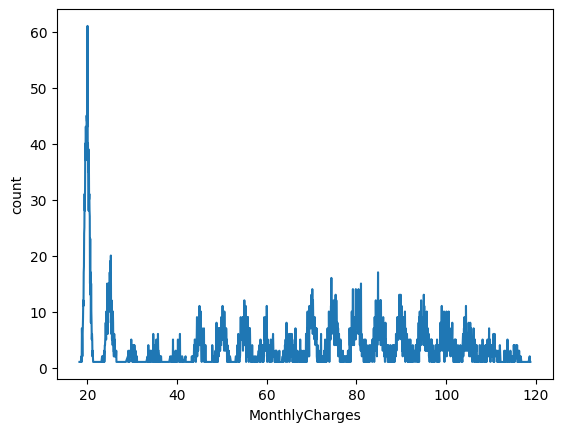

In [72]:
sns.lineplot(x="MonthlyCharges", y="count", data=modes)

In [73]:
# Others ==> Self practice

## Data preprocessing

#### Listing columns which contain null values

In [26]:
from pyspark.sql import functions as F

In [27]:
column_missing_values = {}
for c in df.columns:
	null_count = df.select(c).filter(F.col(c).isNull()).count()
	if null_count > 0:
		column_missing_values[c] = null_count

column_missing_values

{}

### Data Imputation
Data imputation is a data preprocessing technique used to replace missing or null values in a dataset with substituted values. This is an essential step in preparing data for analysis or machine learning, as many algorithms cannot handle missing values directly and may produce biased or inaccurate results if they are present.

Importance of Data Imputation

- Maintaining Data Integrity: Imputation helps ensure that the dataset remains as complete as possible, which is crucial for accurate analysis.
- Improving Model Performance: Many machine learning algorithms perform better when trained on complete datasets, as they can learn patterns more effectively without the noise introduced by missing values.
- Reducing Bias: Proper imputation can help minimize the bias that missing values might introduce into the analysis or modeling process.

Common Imputation Techniques

1. Mean Imputation:
- Replace missing values with the mean of the available values in the column.
- Suitable for normally distributed data.
- Example: If a column has values [1, 2, 3, None, 5], the mean (2.75) can be used to replace None.
2. Median Imputation:
- Replace missing values with the median of the column, which is more robust to outliers.
- Example: For the same column, the median would be 2.5, which can be used for imputation.
3. Mode Imputation:
- Replace missing values with the most frequent value (mode) in the column.
Useful for categorical data.
- Example: If a column of colors contains [red, blue, None, red], you could replace None with red.
4. Forward Fill and Backward Fill:
- Forward fill replaces missing values with the last observed non-null value.
- Backward fill replaces missing values with the next observed non-null value.
- Commonly used in time series data.
5. K-Nearest Neighbors (KNN) Imputation:
- Uses the values from the nearest neighbors (based on distance metrics) to impute missing values.
- Typically more computationally intensive but can be more accurate.
6. Regression Imputation:
- Predicts and fills in missing values using a regression model based on other available features in the dataset.
7. Multiple Imputation:
- Involves creating multiple datasets with different imputed values and averaging the results, providing more robust estimates.


#### Manual imputation
Impute the null or NA vales step by step

In [76]:
# Input here
# measure mean value
# fill the null / NA values with the calculate mean

#### Using Imputer

In data preprocessing, the Imputer in PySpark provides several strategies for handling missing values. These strategies determine how the missing values in a dataset are filled or replaced. Here are the common imputation strategies available in PySpark's Imputer:

1. Mean
- Description: Replaces missing values with the mean (average) of the non-missing values in the column.
- Use Case: Suitable for numerical features that are normally distributed and do not have significant outliers.
2. Median
- Description: Replaces missing values with the median of the non-missing values in the column.
- Use Case: Useful for numerical features, especially when the data contains outliers, as the median is less affected by extreme values than the mean.
3. Mode
- Description: Replaces missing values with the mode (most frequent value) of the non-missing values in the column.
- Use Case: Typically used for categorical features, but can also be applied to numerical features. It is particularly useful when there are repeated values in the dataset.
4. Custom Value
- Description: Allows you to specify a constant value to replace missing values.
- Use Case: Useful when you have domain knowledge about what value should represent the missing entries or when you want to use a specific placeholder.

In [75]:
from pyspark.ml.feature import Imputer

# Create an Imputer
imputer = Imputer(inputCols=["MonthlyCharges"], outputCols=["MonthlyCharges_imputed"]).setStrategy("mean")

# Fit and transform the DataFrame
imputed_df = imputer.fit(df).transform(df)

# View the result
# df.select("MonthlyCharges").show()

In [77]:
# Create an Imputer for mean imputation
imputer_mean = Imputer(inputCols=["MonthlyCharges"], outputCols=["MonthlyCharges_imputed_mean"]).setStrategy("mean")
imputed_mean_df = imputer_mean.fit(df).transform(df)

# Create an Imputer for median imputation
imputer_median = Imputer(inputCols=["MonthlyCharges"], outputCols=["MonthlyCharges_imputed_median"]).setStrategy("median")
imputed_median_df = imputer_median.fit(df).transform(df)

# Create an Imputer for mode imputation (not directly available, so use groupBy for demonstration)
mode_value = df.groupBy("MonthlyCharges").count().orderBy("count", ascending=False).first()[0]
df_mode_imputed = df.fillna({"MonthlyCharges": mode_value})

# Create an Imputer for custom value imputation
custom_value = -1.0  # Example of a custom value
df_custom_imputed = df.fillna({"MonthlyCharges": custom_value})

#### Homeworks

Below are homeworks

#### Standardization and Normalization

- StandardScaler: Scales features to have zero mean and unit variance (Z-score normalization).

In [78]:
# from pyspark.ml.feature import StandardScaler
# scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withMean=True, withStd=True)

- MinMaxScaler: Scales features to a specific range, typically [0, 1].

In [79]:
# from pyspark.ml.feature import MinMaxScaler
# scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

#### Handling Categorical Variables

- StringIndexer: Converts categorical string values into numerical indices.

In [ ]:
# from pyspark.ml.feature import StringIndexer
# indexer = StringIndexer(inputCol="category", outputCol="categoryIndex")

- OneHotEncoder: Converts categorical indices into a one-hot encoded format.


In [80]:
# from pyspark.ml.feature import OneHotEncoder
# encoder = OneHotEncoder(inputCols=["categoryIndex"], outputCols=["categoryVec"])

#### Feature Engineering

- VectorAssembler: Combines multiple columns into a single vector column, which is essential for ML algorithms in Spark.


In [ ]:
# from pyspark.ml.feature import VectorAssembler
# assembler = VectorAssembler(inputCols=["col1", "col2", "col3"], outputCol="features")

- Isolation Forest: Although not directly included in Spark MLlib, you can implement outlier detection using libraries like spark-sklearn or by developing custom algorithms.


#### Text Processing
- Tokenization: Splits text into words.
- StopWordsRemover: Removes common stop words from text data.
- HashingTF / CountVectorizer: Converts text into numerical feature vectors.

#### Feature Selection
- ChiSqSelector: Selects features based on the Chi-squared statistic for categorical features.

In [ ]:
# from pyspark.ml.feature import ChiSqSelector
# selector = ChiSqSelector(featuresCol="features", labelCol="label", outputCol="selectedFeatures", numTopFeatures=10)

#### Outlier Detection
Although not directly included in Spark MLlib, you can implement outlier detection using libraries like spark-sklearn or by developing custom algorithms.